In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

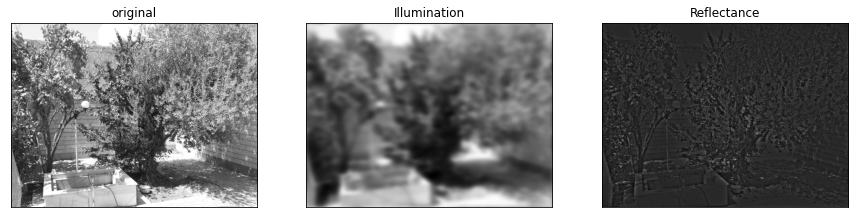

In [18]:
# functions
def gaussianLP(R, imgShape):
    half_rows = int(imgShape[0] / 2)  # half_height
    half_cols = int(imgShape[1] / 2)  # half_width
    [x, y] = np.meshgrid(np.array(range(-half_cols, half_cols)), np.array(range(-half_rows, half_rows)))

    distance = np.sqrt(x ** 2 + y ** 2)
    H = np.exp((-1 / 2) * (distance / R) ** 2)
    return H

im = cv2.normalize(cv2.imread("yard.jpg", cv2.IMREAD_GRAYSCALE).astype("float"), None, 0.0, 1.0, cv2.NORM_MINMAX)

[m, n] = im.shape
# Prevent divide by zero
f = im + 0.0001
z = np.log(f)
# frequency domain
Z = np.fft.fftshift(np.fft.fft2(z))
# Set size and sigma of gaussian filter
v1 = m
v2 = n
v = 15
# Create gaussian filter
H = gaussianLP(v, (v1, v2))
# Apply gaussian filter to image
REF = Z * (1 - H)
LUM = Z * H
# spatial domain
reflect = np.exp(np.fft.ifft2(np.fft.ifftshift(REF)))
lum = np.exp(np.fft.ifft2(np.fft.ifftshift(LUM)))
IFFTt = np.abs(reflect)
Ref = IFFTt
IFFTt2 = np.abs(lum)
Illu = IFFTt2


fig, axes = plt.subplots(1, 3 ,figsize=(15,5))
axes[0].imshow(im, cmap='gray')
axes[0].set_title('original')

axes[1].imshow(Illu, cmap='gray')
axes[1].set_title('Illumination')

axes[2].imshow(Ref, cmap='gray')
axes[2].set_title('Reflectance')

for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()